In [1]:
# dependencies
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# file paths
full_dataPath = Path("./resources/full_data.csv")

In [3]:
# data import
df = pd.read_csv(full_dataPath).set_index('patient_id')
df['planet_id'] = df['planet_id'].replace({1:'Boran',2:'Radan'})
df.head()

,age,blood_pressure,exercise,weight,glucose,BMI,planet_id
patient_id,,,,,,,
5231,75.254768,194.639537,45.811801,145.294390,122.231550,1.005604,Boran
5502,78.425828,102.743158,43.031599,81.072209,77.593129,0.984347,Radan
8248,74.242965,189.628666,90.167716,139.689556,118.206986,0.972132,Boran
8495,79.982882,101.532439,84.264034,77.931413,75.550277,0.963410,Radan
8499,85.809577,104.635367,75.525589,82.481703,79.318150,1.021250,Radan


### Histogram of age distribution on each planet.
More information on how this plot was made can be found here: https://seaborn.pydata.org/tutorial/distributions.html

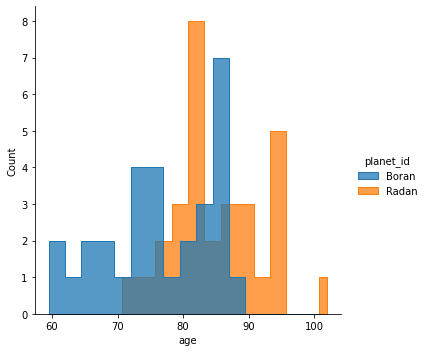

In [4]:
sns.displot(df, x='age', binwidth=2.5, hue='planet_id', element="step", multiple="dodge")

In [5]:
# Average value by planet for all columns
df_mean = pd.pivot_table(df, index='planet_id', aggfunc=np.mean)
df_mean.head()

,BMI,age,blood_pressure,exercise,glucose,weight
planet_id,,,,,,
Boran,1.0,76.419431,193.632568,74.090198,121.310649,143.812437
Radan,1.0,84.217069,103.482301,84.427936,77.832362,80.586650


The mean life expectancy, assuming that the age column is the age of each patients death, is 76.42 years on Boran and 84.22 years on Radan. By definition, the liklihood of living past the average life expectancy will always be 50%.

### Blood pressure boxplot
There must be some strong gravity or terrible diets on Boran. The distribution of blood pressures is much larger on Boran, but that makes sense given how much higher the mean blood pressure is. Neither planet had any notable outliers.

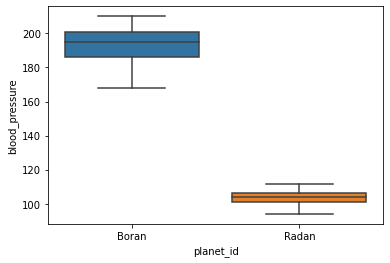

In [6]:
sns.boxplot(x='planet_id', y='blood_pressure', data=df)

### Blood Pressure scatterplots
Blood pressure has really strong correlations between weight, glucose and BMI. There's clear colinearity. There's a weaker correlation The data is much noisier for exercise

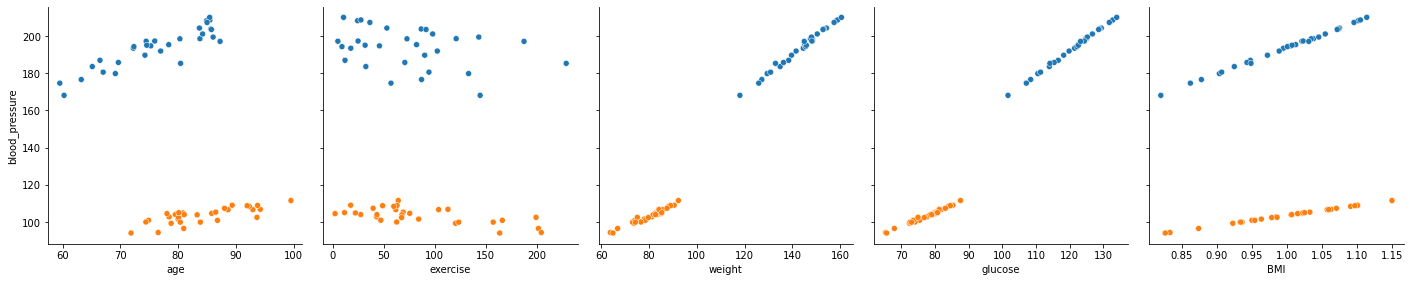

In [7]:
g = sns.PairGrid(data=df,
                 y_vars=["blood_pressure"], 
                 x_vars=["age","exercise","weight","glucose","BMI"], 
                 hue="planet_id",
                 height=4)
g.map(sns.scatterplot)